# Concrete compressive strength 

### Part 1: Construct the Model - Linear Regression

The dataset `concrete_data.csv` contains features that factor in to the compressive strength of concrete:
- the compressive strength in GPa
- the cement component in kg/m$^3$
- the water component as a percentage
- the coarse aggregate component in kg/m$^3$
- the fine aggregate component in kg/m$^3$.

Construct a mathematical model using linear regression for the `concrete_compressive_strength` variable following the **Tasks** below.


Goal : Predict the concrete compressive strength based on cement component, water component, coarse aggregate component, and fine aggregate component.

**Variables and Parameters:**



| Description | Symbol | Units | Type|
|-------------|--------|-------|-------|
| Concrete Compressive Strength | $Y$ | GPa | target (dependent) variable |
| Cement Component | $X1$ | kg/m$^3$| feature (independent) variable |
| Water Component | $X2$ | - | feature (independent) variable |
| Coarse Aggregate Component | $X3$ | kg/m$^3$| feature (independent) variable |
| Fine Aggregate Component | $X4$ | kg/m$^3$| feature (independent) variable |


**Assumptions and Constraints:**

- The data satisfies the assumptions needed to perform linear regression (i.e. the the 4 assumptions on the error term $\epsilon$).
   -  average error is 0
   -  variance is constant
   -  errors are normally distributed
   -  errors are constant
- Trends in the historical data are expected to continue into the future.


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [62]:
df = pd.read_csv("concrete_data.csv")

df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength
0,540.0,0.923441,1040.0,676.0,0.006398
1,540.0,0.923441,1055.0,676.0,0.003830
2,332.5,0.985472,932.0,594.0,0.001622
3,332.5,0.985472,932.0,594.0,0.001685
4,198.6,0.954279,978.4,825.5,0.001962


In [63]:
n = 800

x = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][0:n]
y = df["concrete_compressive_strength"][0:n]
X_test = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][n:-1]
y_test = df["concrete_compressive_strength"][n:-1]

In [64]:
x = sm.add_constant(x)
X_test = sm.add_constant(X_test)

reg_1 = sm.OLS(y, x).fit()
 
summary_table = reg_1.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.397
Model:                                       OLS   Adj. R-squared:                  0.394
Method:                            Least Squares   F-statistic:                     130.9
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           7.33e-86
Time:                                   21:33:42   Log-Likelihood:                 4298.2
No. Observations:                            800   AIC:                            -8586.
Df Residuals:                                795   BIC:                            -8563.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

**Analyze and Assess:**


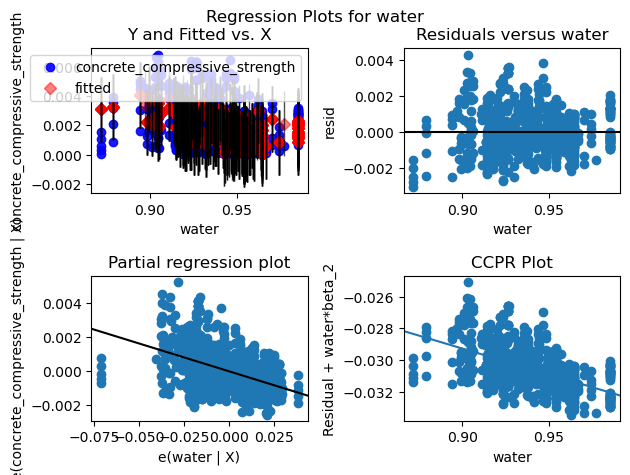

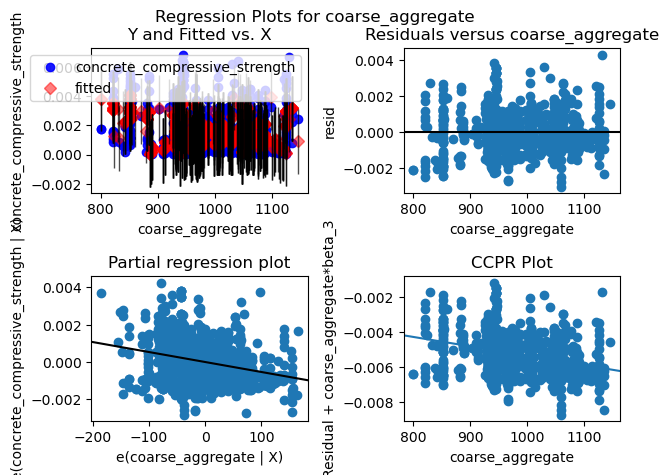

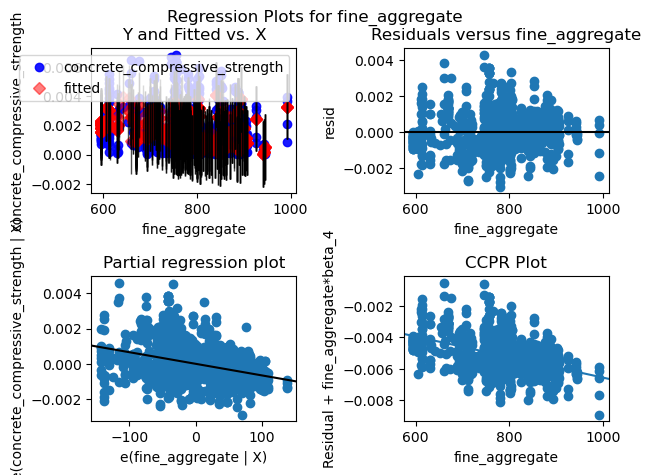

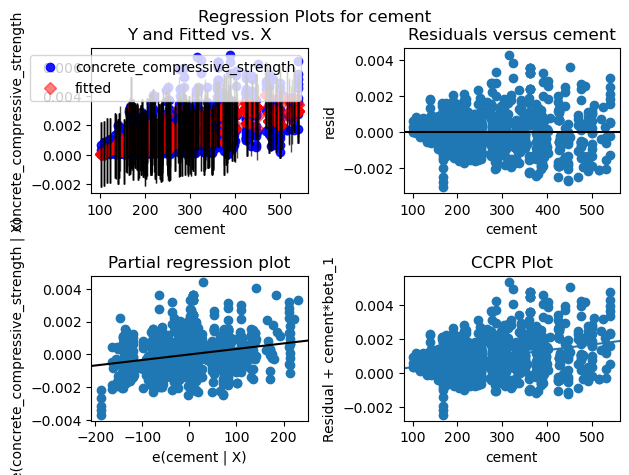

In [65]:
# Assumption 1 : mean error is zero

sm.graphics.plot_regress_exog(reg_1,"water")
sm.graphics.plot_regress_exog(reg_1,"coarse_aggregate")
sm.graphics.plot_regress_exog(reg_1,"fine_aggregate")
sm.graphics.plot_regress_exog(reg_1,"cement")
plt.show()

The residuals vs water, cement, and coarse_aggregate seem to be okay. However, the residuals vs fine_aggregate possibly could have a slight upwards trend, but not too noticable.

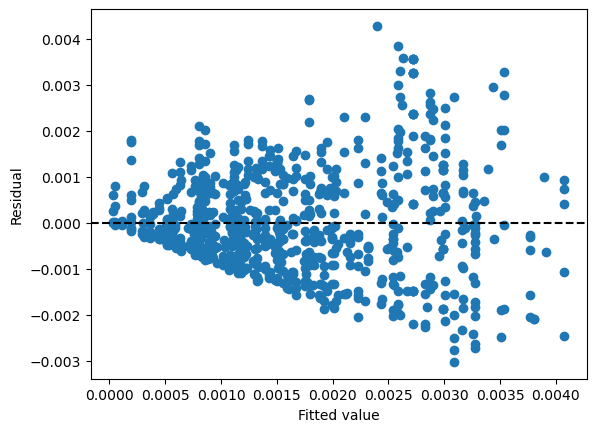

In [66]:
## Assumption: Variance constant

fitted_y1 = reg_1.fittedvalues
residuals1 = reg_1.resid

plt.scatter(fitted_y1,residuals1)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

There seems to be a downwards pattern in this plot.

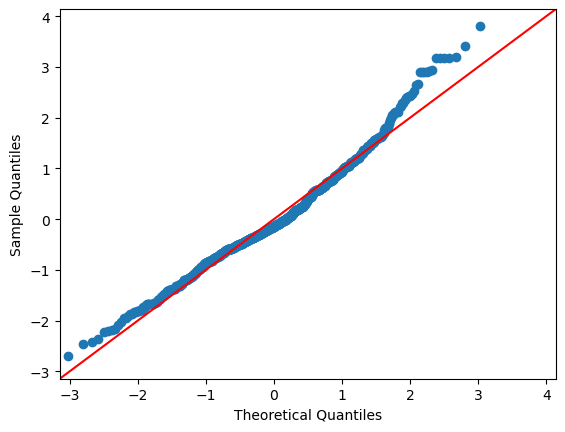

In [67]:
## Assumption: Error normally distributed
## pull out residuals from the model fitting
residuals1 = reg_1.resid

sm.qqplot(residuals1,fit=True, line="45")
plt.show()

Since this is not a time series, we can't run residuals vs index plot.


Overall , most of the diagnostics plots in assumption 1 seem like they fit the assumption that the mean is zero. However, the model violates the assumption that the variance is constant as it seems to have a downwards trend. The qq plot also shows that the residuals are not normally distributed.

#### Try different transformations to the data to determind the best linear regression model.
1. `np.exp(water)`
2. `concrete_compressive_strength**2`
3. `np.sqrt(concrete_compressive_strength)`

#### Try transformation #1 : np.exp(water)

In [68]:
df["water2"] = np.exp(df["water"])

df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength,water2
0,540.0,0.923441,1040.0,676.0,0.006398,2.517940
1,540.0,0.923441,1055.0,676.0,0.003830,2.517940
2,332.5,0.985472,932.0,594.0,0.001622,2.679075
3,332.5,0.985472,932.0,594.0,0.001685,2.679075
4,198.6,0.954279,978.4,825.5,0.001962,2.596798


In [69]:
n = 800

x = df[["cement", "water2", "coarse_aggregate", "fine_aggregate"]][0:n]
y = df["concrete_compressive_strength"][0:n]
X_test = df[["cement", "water2", "coarse_aggregate", "fine_aggregate"]][n:-1]
y_test = df["concrete_compressive_strength"][n:-1]

In [70]:
x = sm.add_constant(x)
X_test = sm.add_constant(X_test)

reg_2 = sm.OLS(y, x).fit()
 
summary_table = reg_2.summary()
print(summary_table)

                                  OLS Regression Results                                 
Dep. Variable:     concrete_compressive_strength   R-squared:                       0.397
Model:                                       OLS   Adj. R-squared:                  0.394
Method:                            Least Squares   F-statistic:                     131.0
Date:                           Tue, 05 Dec 2023   Prob (F-statistic):           6.09e-86
Time:                                   21:34:01   Log-Likelihood:                 4298.4
No. Observations:                            800   AIC:                            -8587.
Df Residuals:                                795   BIC:                            -8563.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------

The Adj-R squared value seems to have not changed.

 #### Let's try transformation #2

In [71]:
df["concrete_compressive_strength2"] = (df["concrete_compressive_strength"])**2

df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength,water2,concrete_compressive_strength2
0,540.0,0.923441,1040.0,676.0,0.006398,2.517940,0.000041
1,540.0,0.923441,1055.0,676.0,0.003830,2.517940,0.000015
2,332.5,0.985472,932.0,594.0,0.001622,2.679075,0.000003
3,332.5,0.985472,932.0,594.0,0.001685,2.679075,0.000003
4,198.6,0.954279,978.4,825.5,0.001962,2.596798,0.000004


In [72]:
n = 800

x = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][0:n]
y = df["concrete_compressive_strength2"][0:n]
X_test = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][n:-1]
y_test = df["concrete_compressive_strength2"][n:-1]

In [73]:
x = sm.add_constant(x)
X_test = sm.add_constant(X_test)

reg_3 = sm.OLS(y, x).fit()
 
summary_table = reg_3.summary()
print(summary_table)

                                  OLS Regression Results                                  
Dep. Variable:     concrete_compressive_strength2   R-squared:                       0.313
Model:                                        OLS   Adj. R-squared:                  0.309
Method:                             Least Squares   F-statistic:                     90.42
Date:                            Tue, 05 Dec 2023   Prob (F-statistic):           2.32e-63
Time:                                    21:34:02   Log-Likelihood:                 8421.4
No. Observations:                             800   AIC:                        -1.683e+04
Df Residuals:                                 795   BIC:                        -1.681e+04
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

The Adj-R squared seems to have gotten worse  from 0.394 to  to 0.309. 

#### Let's try a 3rd transformation

In [74]:
df["concrete_compressive_strength3"] = np.sqrt(df["concrete_compressive_strength"])

df.head()

,cement,water,coarse_aggregate,fine_aggregate,concrete_compressive_strength,water2,concrete_compressive_strength2,concrete_compressive_strength3
0,540.0,0.923441,1040.0,676.0,0.006398,2.517940,0.000041,0.07999
1,540.0,0.923441,1055.0,676.0,0.003830,2.517940,0.000015,0.06189
2,332.5,0.985472,932.0,594.0,0.001622,2.679075,0.000003,0.04027
3,332.5,0.985472,932.0,594.0,0.001685,2.679075,0.000003,0.04105
4,198.6,0.954279,978.4,825.5,0.001962,2.596798,0.000004,0.04430


In [75]:
n = 800

x = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][0:n]
y = df["concrete_compressive_strength3"][0:n]
X_test = df[["cement", "water", "coarse_aggregate", "fine_aggregate"]][n:-1]
y_test = df["concrete_compressive_strength3"][n:-1]

In [76]:
x = sm.add_constant(x)
X_test = sm.add_constant(X_test)

reg_4 = sm.OLS(y, x).fit()
 
summary_table = reg_4.summary()
print(summary_table)

                                  OLS Regression Results                                  
Dep. Variable:     concrete_compressive_strength3   R-squared:                       0.407
Model:                                        OLS   Adj. R-squared:                  0.404
Method:                             Least Squares   F-statistic:                     136.6
Date:                            Tue, 05 Dec 2023   Prob (F-statistic):           7.86e-89
Time:                                    21:34:03   Log-Likelihood:                 2305.5
No. Observations:                             800   AIC:                            -4601.
Df Residuals:                                 795   BIC:                            -4577.
Df Model:                                       4                                         
Covariance Type:                        nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----

The adj-r squared value increased here to 0.404 from 0.394. Since this is the highest adj-R2 score, this is the best model for this data set.

#### Now use the best model to show how concrete compressive strength changes under various conditions 

Choosing the last model as its adj R value is the highest

### Determine if the model satisfies our assumptions

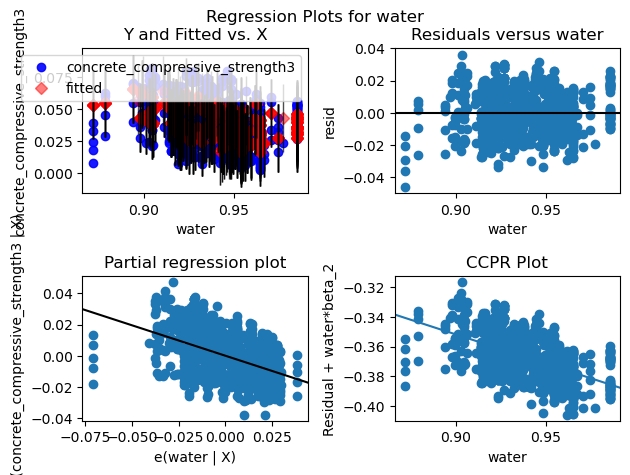

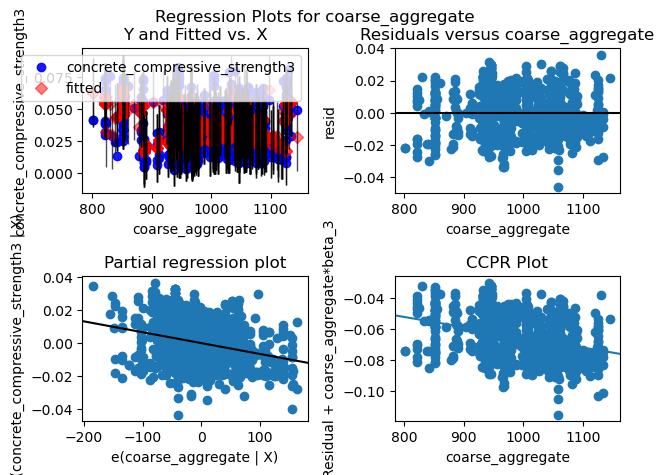

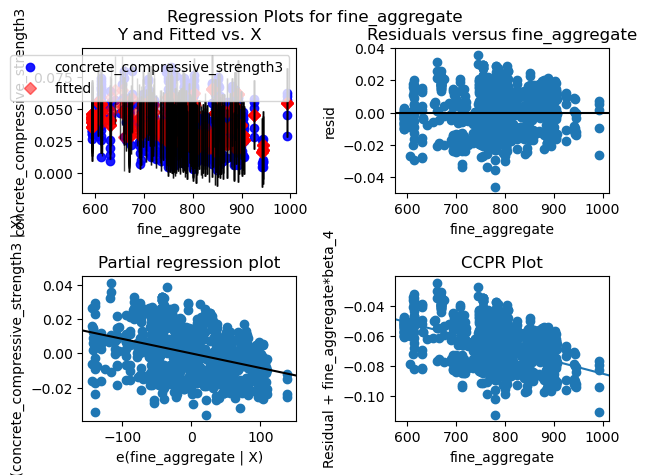

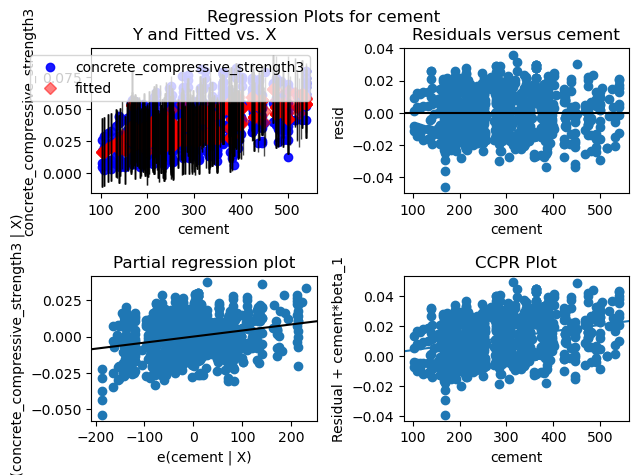

In [77]:
#Assumption 1 : mean error is zero

sm.graphics.plot_regress_exog(reg_4,"water")
sm.graphics.plot_regress_exog(reg_4,"coarse_aggregate")
sm.graphics.plot_regress_exog(reg_4,"fine_aggregate")
sm.graphics.plot_regress_exog(reg_4,"cement")
plt.show()

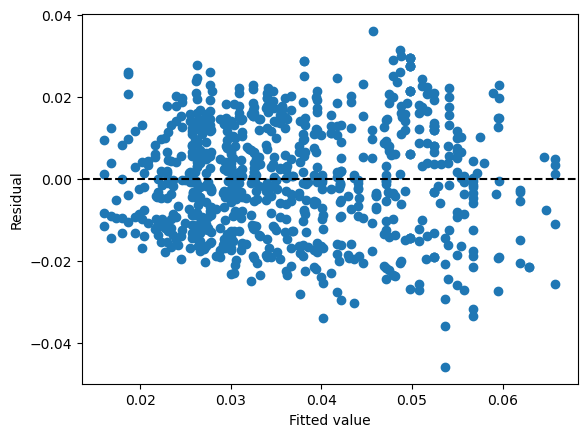

In [78]:
## Assumption: Variance constant

fitted_y1 = reg_4.fittedvalues
residuals1 = reg_4.resid

plt.scatter(fitted_y1,residuals1)
plt.axhline(y = 0, color = 'k', linestyle = '--')
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.show()

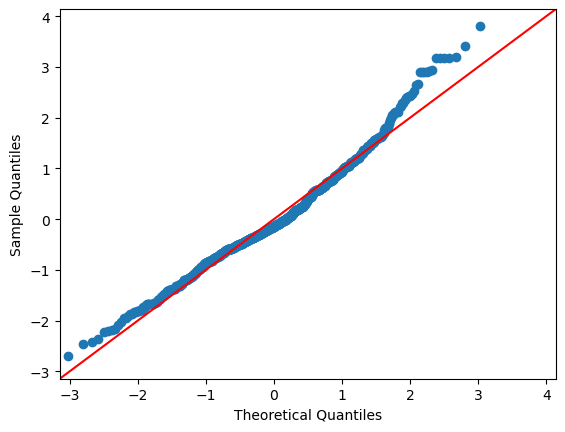

In [79]:
## Assumption: Error normally distributed
## pull out residuals from the model fitting
residuals1 = reg_1.resid

sm.qqplot(residuals1,fit=True, line="45")
plt.show()

In [80]:
e = reg_4.params[0]
b1 = reg_4.params[1]
b2 = reg_4.params[2]
b3 = reg_4.params[3]
b4 = reg_4.params[4]

In [81]:
reg_4.params

const               0.523021
cement              0.000042
water              -0.390967
coarse_aggregate   -0.000066
fine_aggregate     -0.000085
dtype: float64

In [82]:
cement = 2000
water = 1
CA = 100
FA = 100

In [83]:
b1*cement + b2*water + b3*CA + b4*FA + e

0.20067199658110324

In [84]:
cement = 2000
water = 10
CA = 10
FA = 10

b1*cement + b2*water + b3*CA + b4*FA + e

-3.30448174249657

0.00810063669017391


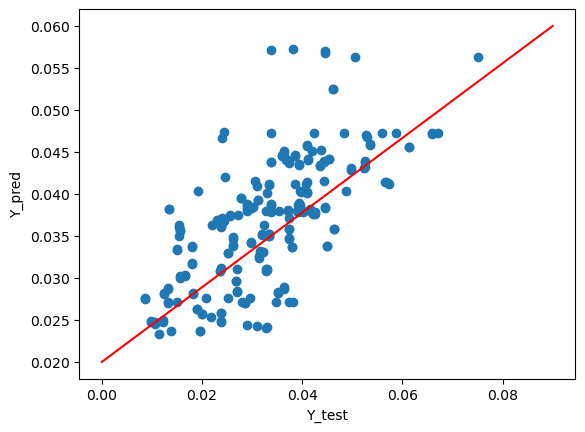

In [85]:
Y_pred = reg_4.predict(X_test)
error = np.abs(Y_pred- y_test)
print(np.mean(error))

plt.scatter(y_test,Y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.plot(np.linspace(0,0.09,100),np.linspace(0.02,0.06,100), color = "red")
plt.show()

Transformation #3 ended up being the best model, with the highest R2 value. All assumptions were satisfied as well when we plotted for mean error, variance and qq plot. Water has the largest coefficient, so the model is more sensitive to changes in water. The more cement there is, the stronger the concrete is. The more water there is, the weaker the concrete is.

### Part 2: Collaborate, Refine, and Simulate the Model

After submitting your work in Part 1 in class, work in groups and compare your results. Collaborate, refine, and simulate your models.

Present your work in a Jupyter notebook including all parts in Part $1$ along with:
- Numerical solutions
- Visualizations of solutions
- Analysis and discussion of the results.

In addition, include a clearly labelled section at the end of your Jupyter notebook, where you discuss the improvements you have made and/or what steps have been taken to refine the model.

Students work collaboratively but submit their own final Jupyter notebook individually. Include names of all students with whom you collaborated in Part $2$.

#### Part 2 - Reflection 
This reflection should have two parts: 

1) Explain in a list of bullet points the changes you have made to your model in the version you are submitting and why you chose to make those changes. 

2) In a paragraph or two reflect on the following prompts:
    - What part of the six modelling steps was the most challenging for you?
    - What helped you to identify any mistakes/misconceptions in your original model?
    - Do you think these techniques would be helpful for identifying mistakes/misconceptions in future assignments? Why or why not? 

question 1)

- added cement to : sm.graphics.plot_regress_exog(reg_1,"cement")
- assessed whether the model chosen for the last task satisfied all assumptions (mean error 0, constant variance, qq plot)
- used parameters of model chosen and adjusted inputs to see how Y changed
 
question 2)

- building the model was the hardest because there is a lot of strict steps to follow and make sure none are missed
- taking time to go over everything and being able to discuss with classmates helped me fix any mistakes in original model
- yes, having more time to go over the assignment because I won't be so stressed and constrained with time, trying to rush everything.
-  